In [116]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits  # If your catalog is in ASCII format, otherwise use the appropriate format

def plot_star_positions(image, catalog, x_col='X_IMAGE', y_col='Y_IMAGE', q=[2.1, 97.7]):
    """
    Plots star positions from a catalog onto the original image.

    Parameters
    ----------
    image : numpy array
        The original image as a 2D numpy array.
    catalog_path : str
        The path to the catalog file.
    x_col : str, optional
        The name of the column containing the X positions in the catalog. Default is 'X_IMAGE'.
    y_col : str, optional
        The name of the column containing the Y positions in the catalog. Default is 'Y_IMAGE'.
    """
    
    
    # Extract X and Y positions
    x_positions = catalog[x_col]
    y_positions = catalog[y_col]
    
    image_data = fits.getdata(image)
    vmin, vmax = np.percentile(image_data, q=q)
    plt.figure(figsize=(15, 15))
    # Plot the image and star positions
    plt.imshow(image_data, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    plt.scatter(x_positions, y_positions, edgecolors='r', facecolors='none', marker='o', s=2, alpha=0.8)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Star Positions from Catalog')

    plt.show()

In [2]:
import mar

Could not load pyraf!


In [110]:
im = "proc_SPLUS-GAL-20180325-043215.fits.fz"

In [111]:
rm catastro_notf.fits

In [112]:
sextr = mar.reduction.SExtractorCatalog(im, catname="catastro_notf.fits", folder="./")
sextr.run()

In [113]:
catop = mar.reduction.CatalogOperation("catastro_notf.fits")
catop.stars()

In [114]:
catalog = catop.catalogStars
bright_stars = catalog[(catalog['FLUX_AUTO'] > np.percentile(catalog['FLUX_AUTO'], 0.9)) &
                           (catalog['FWHM_IMAGE'] > 0)]

In [ ]:
class CatalogOperation:
	def __init__(self, catalog):
		"""Instantiate class with catalog path name. 

		Args:
			catalog (str): file path.
		"""
		self.table = fits.open(catalog)
		self.catalog = Table(self.table[2].data)
		self.marConf = mar.AttributeDict(mar.env.marConf.Reduction)

	def stars(self):
		"""Function to calculate inicial seeing FWHM, and some stats from given catalog. 
		"""		
		MarManager.INFO("Calculating 'seeing' FWHM and stats from catalog.")

		magerrmax = 1.0857 / self.marConf.FWHM_SNmin
		
		selection = (
			 (self.catalog["FLAGS"] == 0) &
			 (self.catalog["ELLIPTICITY"] < self.marConf.FWHM_ELLIPMAX) &
			 (self.catalog["ISOAREA_IMAGE"] > self.marConf.FWHM_ISOAREAMIN) &
			 (self.catalog["MAGERR_AUTO"] < magerrmax)
		)
		
		self.catalogStars = self.catalog[selection]
		self.catalogStars.sort('MAGERR_AUTO')
		
		self.stats = mar.utilities.robustStat(self.catalogStars[0:150]['FWHM_IMAGE'])
		self.FWHMSEXT = self.stats['median'] * self.marConf.PIXSCALE
		if not self.stats['rms']:
			self.stats['rms'] = 0
			MarManager.WARN("Invalid FWHMSRMS (rms - NoneType)")
		self.FWHMSRMS = self.stats['rms'] * self.marConf.PIXSCALE

In [129]:
marConf = mar.AttributeDict(mar.env.marConf.Reduction)

In [130]:
marConf.FWHM_ELLIPMAX

0.2

In [131]:
marConf.FWHM_ISOAREAMIN

40

In [133]:
1.0857 / marConf.FWHM_SNmin

0.03619000000000001

In [158]:
 catop.catalogStars.sort("MAGERR_AUTO")

In [161]:
catop.catalogStars[0:150]

NUMBER,X_IMAGE,Y_IMAGE,THETA_WORLD,ERRTHETA_WORLD,ERRA_IMAGE,ERRB_IMAGE,ERRTHETA_IMAGE,FLUX_AUTO,FLUXERR_AUTO,ALPHA_J2000,DELTA_J2000,X_WORLD,Y_WORLD,MAG_AUTO,MAG_BEST,MAGERR_AUTO,MAGERR_BEST,FLUX_MAX,FWHM_IMAGE,FLAGS,ELLIPTICITY,MU_THRESHOLD,THRESHOLD,BACKGROUND,THETA_IMAGE,A_IMAGE,B_IMAGE,FLUX_RADIUS,ISOAREA_IMAGE,XWIN_IMAGE,YWIN_IMAGE,ERRAWIN_IMAGE,ERRBWIN_IMAGE,ERRTHETAWIN_IMAGE
int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float32,float32,float32
31821,7413.306,4953.696,-84.9726,84.58886,0.0056985826,0.0054071997,83.88278,5469802.5,2483.3555,134.13560683668655,-43.25985765937426,134.13560683668655,-43.25985765937426,8.155071,8.155071,0.00049305696,0.00049305696,62671.48,22.5194,0,0.13337415,20.317253,22.265125,181.01366,-85.17276,7.4661384,6.4703484,3.9387567,4884,7412.990143024561,4953.523674958272,0.0021642682,0.001939085,-89.73567
27342,6026.412,4136.5522,72.23938,67.08131,0.005654512,0.0049683396,66.81507,5179045.5,2405.9316,134.4277490607309,-43.13297896181809,134.4277490607309,-43.13297896181809,8.2143755,8.2143755,0.00050450256,0.00050450256,60852.406,30.462038,0,0.10557431,20.433609,22.265125,178.61568,71.96542,6.6588,5.955802,3.8299346,4487,6026.19572518599,4136.30335814699,0.0022166716,0.0019094623,-81.83027
33439,4363.935,5340.9736,-82.00648,-73.23104,0.0052261613,0.0047537633,-73.7515,4677733.5,2281.4617,134.78169741852346,-43.31661473096612,134.78169741852346,-43.31661473096612,8.324911,8.324911,0.0005296726,0.0005296726,63783.668,34.579304,0,0.07612151,20.39612,22.265125,173.23055,-82.55978,5.993598,5.5373564,3.6477208,4043,4363.657420361315,5340.891212192816,0.0022461019,0.001830718,-81.800514
15525,5682.1777,2156.1538,71.01225,68.89609,0.0066000638,0.006089071,69.32997,4649970.0,2293.9988,134.49775577203735,-42.8275131916076,134.49775577203735,-42.8275131916076,8.331374,8.331374,0.00053576316,0.00053576316,60684.75,30.09998,0,0.058498144,20.467316,22.265125,175.93147,71.675766,6.785243,6.388319,3.6492443,5133,5681.82662811064,2155.766724904497,0.0022301353,0.0019019071,-72.416664
12689,4645.3086,1744.5862,78.65144,73.12806,0.005461597,0.004830643,73.00104,4520540.0,2241.7625,134.71480935340628,-42.762844165807266,134.71480935340628,-42.762844165807266,8.362024,8.362024,0.0005385538,0.0005385538,61428.33,33.666565,0,0.08422458,20.345802,22.265125,171.62361,78.480934,5.861221,5.367562,3.536456,3857,4644.949789337104,1744.3897446030203,0.0021876239,0.0019095354,-80.105934
10706,4813.785,1476.6512,66.09953,69.23435,0.0058420617,0.005200688,69.370636,4226280.0,2177.4043,134.67895057055122,-42.72191694617673,134.67895057055122,-42.72191694617673,8.435104,8.435104,0.0005595136,0.0005595136,61489.312,35.17809,0,0.061136365,20.340267,22.265125,171.42572,66.803276,6.0484867,5.6787043,3.4644365,3968,4813.552353023269,1476.039331575109,0.0021672198,0.001959196,-71.009254
20397,3500.1387,2996.0227,76.72396,59.80626,0.0053117517,0.0050589363,59.335564,4177494.2,2156.3528,134.95854417651432,-42.95355966988832,134.95854417651432,-42.95355966988832,8.44771,8.44771,0.00056057505,0.00056057505,63756.137,32.759502,0,0.057398677,20.429565,22.265125,176.52792,75.770325,5.621632,5.298958,3.4460623,3673,3499.850220165638,2995.651556819551,0.002242509,0.0018380859,-83.00575
12008,6738.712,1702.0498,-83.810616,-71.185555,0.0055250823,0.004819132,-70.93963,4140469.8,2150.7314,134.2757091023546,-42.75881609040852,134.2757091023546,-42.75881609040852,8.457376,8.457376,0.0005641134,0.0005641134,62331.793,31.45963,0,0.10021907,20.369171,22.265125,177.27826,-83.1766,5.924265,5.3305407,3.3092115,3678,6738.552016500248,1702.0195084083969,0.002116306,0.0019373103,-65.883995
16954,7781.1787,2454.7344,-84.72631,-88.36995,0.0052890293,0.005054617,-85.96626,4068381.8,2127.4841,134.05751883050505,-42.87526654231311,134.05751883050505,-42.8752665

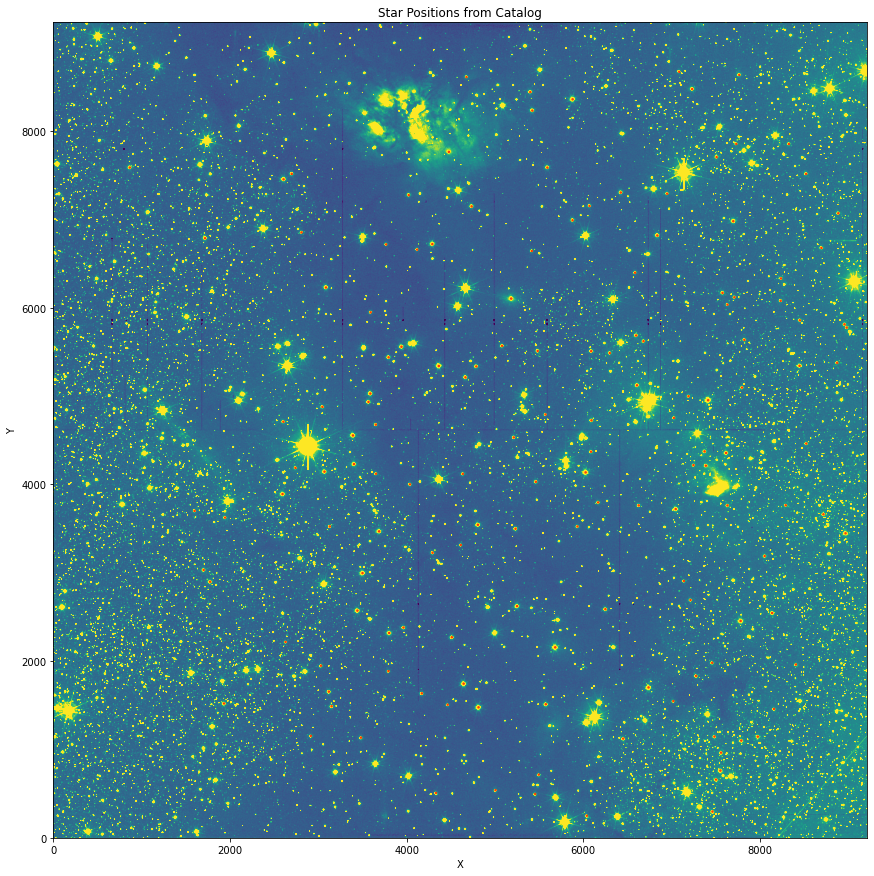

In [119]:
plot_star_positions(im, catop.catalogStars[0:100], q=[2.1, 97.9])

In [150]:
import numpy as np
from astropy.io import ascii
from astropy.table import Table
from photutils.psf import DAOGroup, IntegratedGaussianPRF
from photutils.psf import BasicPSFPhotometry
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm

def fit_bright_stars(image, catalog, flux_col='FLUX_AUTO', fwhm_col='FWHM_IMAGE', saturation_threshold=0.9):
    
    # Filter the catalog to select only the brighter and better stars (not saturated)
    # You can adjust the conditions based on your specific requirements
    bright_stars = catalog[(catalog[flux_col] > np.percentile(catalog[flux_col], saturation_threshold)) &
                           (catalog[fwhm_col] > 0)]
    
    bright_stars['x_0'] = bright_stars['X_IMAGE']
    bright_stars['y_0'] = bright_stars['Y_IMAGE']
    
    # Set up the photometry and group objects
    daogroup = DAOGroup(2.0 * gaussian_sigma_to_fwhm)  # You can adjust the threshold based on your requirements
    fitter = LevMarLSQFitter()
    psf_model = IntegratedGaussianPRF(sigma=bright_stars[fwhm_col].mean() / gaussian_sigma_to_fwhm)

    # Perform the fit using BasicPSFPhotometry
    photometry = BasicPSFPhotometry(group_maker=daogroup, bkg_estimator=None,
                                    psf_model=psf_model, fitter=fitter,
                                    fitshape=(11, 11))  # You can adjust the fitshape based on your requirements
    result = photometry(image=image, init_guesses=Table(bright_stars))

    return result, fitter.fit_info


In [163]:
%%time
fit_results, fit_info = fit_bright_stars(fits.getdata(im).astype('float64'), catop.catalogStars[0:150])

CPU times: user 39.1 s, sys: 51.2 s, total: 1min 30s
Wall time: 1min 47s


In [126]:
catop.catalogStars[0:100]

NUMBER,X_IMAGE,Y_IMAGE,THETA_WORLD,ERRTHETA_WORLD,ERRA_IMAGE,ERRB_IMAGE,ERRTHETA_IMAGE,FLUX_AUTO,FLUXERR_AUTO,ALPHA_J2000,DELTA_J2000,X_WORLD,Y_WORLD,MAG_AUTO,MAG_BEST,MAGERR_AUTO,MAGERR_BEST,FLUX_MAX,FWHM_IMAGE,FLAGS,ELLIPTICITY,MU_THRESHOLD,THRESHOLD,BACKGROUND,THETA_IMAGE,A_IMAGE,B_IMAGE,FLUX_RADIUS,ISOAREA_IMAGE,XWIN_IMAGE,YWIN_IMAGE,ERRAWIN_IMAGE,ERRBWIN_IMAGE,ERRTHETAWIN_IMAGE
int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float32,float32,float32
31821,7413.306,4953.696,-84.9726,84.58886,0.0056985826,0.0054071997,83.88278,5469802.5,2483.3555,134.13560683668655,-43.25985765937426,134.13560683668655,-43.25985765937426,8.155071,8.155071,0.00049305696,0.00049305696,62671.48,22.5194,0,0.13337415,20.317253,22.265125,181.01366,-85.17276,7.4661384,6.4703484,3.9387567,4884,7412.990143024561,4953.523674958272,0.0021642682,0.001939085,-89.73567
27342,6026.412,4136.5522,72.23938,67.08131,0.005654512,0.0049683396,66.81507,5179045.5,2405.9316,134.4277490607309,-43.13297896181809,134.4277490607309,-43.13297896181809,8.2143755,8.2143755,0.00050450256,0.00050450256,60852.406,30.462038,0,0.10557431,20.433609,22.265125,178.61568,71.96542,6.6588,5.955802,3.8299346,4487,6026.19572518599,4136.30335814699,0.0022166716,0.0019094623,-81.83027
33439,4363.935,5340.9736,-82.00648,-73.23104,0.0052261613,0.0047537633,-73.7515,4677733.5,2281.4617,134.78169741852346,-43.31661473096612,134.78169741852346,-43.31661473096612,8.324911,8.324911,0.0005296726,0.0005296726,63783.668,34.579304,0,0.07612151,20.39612,22.265125,173.23055,-82.55978,5.993598,5.5373564,3.6477208,4043,4363.657420361315,5340.891212192816,0.0022461019,0.001830718,-81.800514
15525,5682.1777,2156.1538,71.01225,68.89609,0.0066000638,0.006089071,69.32997,4649970.0,2293.9988,134.49775577203735,-42.8275131916076,134.49775577203735,-42.8275131916076,8.331374,8.331374,0.00053576316,0.00053576316,60684.75,30.09998,0,0.058498144,20.467316,22.265125,175.93147,71.675766,6.785243,6.388319,3.6492443,5133,5681.82662811064,2155.766724904497,0.0022301353,0.0019019071,-72.416664
12689,4645.3086,1744.5862,78.65144,73.12806,0.005461597,0.004830643,73.00104,4520540.0,2241.7625,134.71480935340628,-42.762844165807266,134.71480935340628,-42.762844165807266,8.362024,8.362024,0.0005385538,0.0005385538,61428.33,33.666565,0,0.08422458,20.345802,22.265125,171.62361,78.480934,5.861221,5.367562,3.536456,3857,4644.949789337104,1744.3897446030203,0.0021876239,0.0019095354,-80.105934
10706,4813.785,1476.6512,66.09953,69.23435,0.0058420617,0.005200688,69.370636,4226280.0,2177.4043,134.67895057055122,-42.72191694617673,134.67895057055122,-42.72191694617673,8.435104,8.435104,0.0005595136,0.0005595136,61489.312,35.17809,0,0.061136365,20.340267,22.265125,171.42572,66.803276,6.0484867,5.6787043,3.4644365,3968,4813.552353023269,1476.039331575109,0.0021672198,0.001959196,-71.009254
20397,3500.1387,2996.0227,76.72396,59.80626,0.0053117517,0.0050589363,59.335564,4177494.2,2156.3528,134.95854417651432,-42.95355966988832,134.95854417651432,-42.95355966988832,8.44771,8.44771,0.00056057505,0.00056057505,63756.137,32.759502,0,0.057398677,20.429565,22.265125,176.52792,75.770325,5.621632,5.298958,3.4460623,3673,3499.850220165638,2995.651556819551,0.002242509,0.0018380859,-83.00575
12008,6738.712,1702.0498,-83.810616,-71.185555,0.0055250823,0.004819132,-70.93963,4140469.8,2150.7314,134.2757091023546,-42.75881609040852,134.2757091023546,-42.75881609040852,8.457376,8.457376,0.0005641134,0.0005641134,62331.793,31.45963,0,0.10021907,20.369171,22.265125,177.27826,-83.1766,5.924265,5.3305407,3.3092115,3678,6738.552016500248,1702.0195084083969,0.002116306,0.0019373103,-65.883995
16954,7781.1787,2454.7344,-84.72631,-88.36995,0.0052890293,0.005054617,-85.96626,4068381.8,2127.4841,134.05751883050505,-42.87526654231311,134.05751883050505,-42.8752665

In [125]:
fit_results

NUMBER,X_IMAGE,Y_IMAGE,THETA_WORLD,ERRTHETA_WORLD,ERRA_IMAGE,ERRB_IMAGE,ERRTHETA_IMAGE,FLUX_AUTO,FLUXERR_AUTO,ALPHA_J2000,DELTA_J2000,X_WORLD,Y_WORLD,MAG_AUTO,MAG_BEST,MAGERR_AUTO,MAGERR_BEST,FLUX_MAX,FWHM_IMAGE,FLAGS,ELLIPTICITY,MU_THRESHOLD,THRESHOLD,BACKGROUND,THETA_IMAGE,A_IMAGE,B_IMAGE,FLUX_RADIUS,ISOAREA_IMAGE,XWIN_IMAGE,YWIN_IMAGE,ERRAWIN_IMAGE,ERRBWIN_IMAGE,ERRTHETAWIN_IMAGE,x_0,y_0,flux_0,id,group_id,x_fit,y_fit,flux_fit,flux_unc,x_0_unc,y_0_unc
int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64
31821,7413.306,4953.696,-84.9726,84.58886,0.0056985826,0.0054071997,83.88278,5469802.5,2483.3555,134.13560683668655,-43.25985765937426,134.13560683668655,-43.25985765937426,8.155071,8.155071,0.00049305696,0.00049305696,62671.48,22.5194,0,0.13337415,20.317253,22.265125,181.01366,-85.17276,7.4661384,6.4703484,3.9387567,4884,7412.990143024561,4953.523674958272,0.0021642682,0.001939085,-89.73567,7413.306,4953.696,5335380.481604636,1,1,7410.32078311169,4951.040583139968,11709497.830166012,736747.32248094,0.6821557627689012,0.6938131527633304
27342,6026.412,4136.5522,72.23938,67.08131,0.005654512,0.0049683396,66.81507,5179045.5,2405.9316,134.4277490607309,-43.13297896181809,134.4277490607309,-43.13297896181809,8.2143755,8.2143755,0.00050450256,0.00050450256,60852.406,30.462038,0,0.10557431,20.433609,22.265125,178.61568,71.96542,6.6588,5.955802,3.8299346,4487,6026.19572518599,4136.30335814699,0.0022166716,0.0019094623,-81.83027,6026.412,4136.5522,5101018.356252046,2,2,6024.065137548929,4133.515082391684,12000112.445374118,789213.3690874951,0.6944211393527219,0.7193247363613977
33439,4363.935,5340.9736,-82.00648,-73.23104,0.0052261613,0.0047537633,-73.7515,4677733.5,2281.4617,134.78169741852346,-43.31661473096612,134.78169741852346,-43.31661473096612,8.324911,8.324911,0.0005296726,0.0005296726,63783.668,34.579304,0,0.07612151,20.39612,22.265125,173.23055,-82.55978,5.993598,5.5373564,3.6477208,4043,4363.657420361315,5340.891212192816,0.0022461019,0.001830718,-81.800514,4363.935,5340.9736,4654315.377701232,3,3,4360.539862438714,5339.023966043628,10920005.570562154,858004.2267817855,0.8579927891978653,0.8322845964672498
15525,5682.1777,2156.1538,71.01225,68.89609,0.0066000638,0.006089071,69.32997,4649970.0,2293.9988,134.49775577203735,-42.8275131916076,134.49775577203735,-42.8275131916076,8.331374,8.331374,0.00053576316,0.00053576316,60684.75,30.09998,0,0.058498144,20.467316,22.265125,175.93147,71.675766,6.785243,6.388319,3.6492443,5133,5681.82662811064,2155.766724904497,0.0022301353,0.0019019071,-72.416664,5682.1777,2156.1538,4590918.1927499585,4,4,5678.903512090129,2153.788371963473,10980499.26662662,806013.9145936965,0.8038724097402674,0.8061818956334568
12689,4645.3086,1744.5862,78.65144,73.12806,0.005461597,0.004830643,73.00104,4520540.0,2241.7625,134.71480935340628,-42.762844165807266,134.71480935340628,-42.762844165807266,8.362024,8.362024,0.0005385538,0.0005385538,61428.33,33.666565,0,0.08422458,20.345802,22.265125,171.62361,78.480934,5.861221,5.367562,3.536456,3857,4644.949789337104,1744.3897446030203,0.0021876239,0.0019095354,-80.105934,4645.3086,1744.5862,4515550.735892773,5,5,4642.152305136721,1741.8671066471873,11123688.69096811,866104.9662681984,0.8024954927191257,0.8236383528627914
10706,4813.785,1476.6512,66.09953,69.23435,0.0058420617,0.005200688,69.370636,4226280.0,2177.4043,134.67895057055122,-42.72191694617673,134.67895057055122,-42.72191694617673,8.435104,8.435104,0.0005595136,0.0005595136,61489.312,35.17809,0,0.061136365,20.340267,22.265125,171.42572,66.803276,6.0484867,5.6787043,3.4644365,3968,4813.552353023269,1476.039331575109,0.0021672198,0.001959196,-71.009254,4813.785,1476.6512,4197200.139900721,6,6,4810.2090

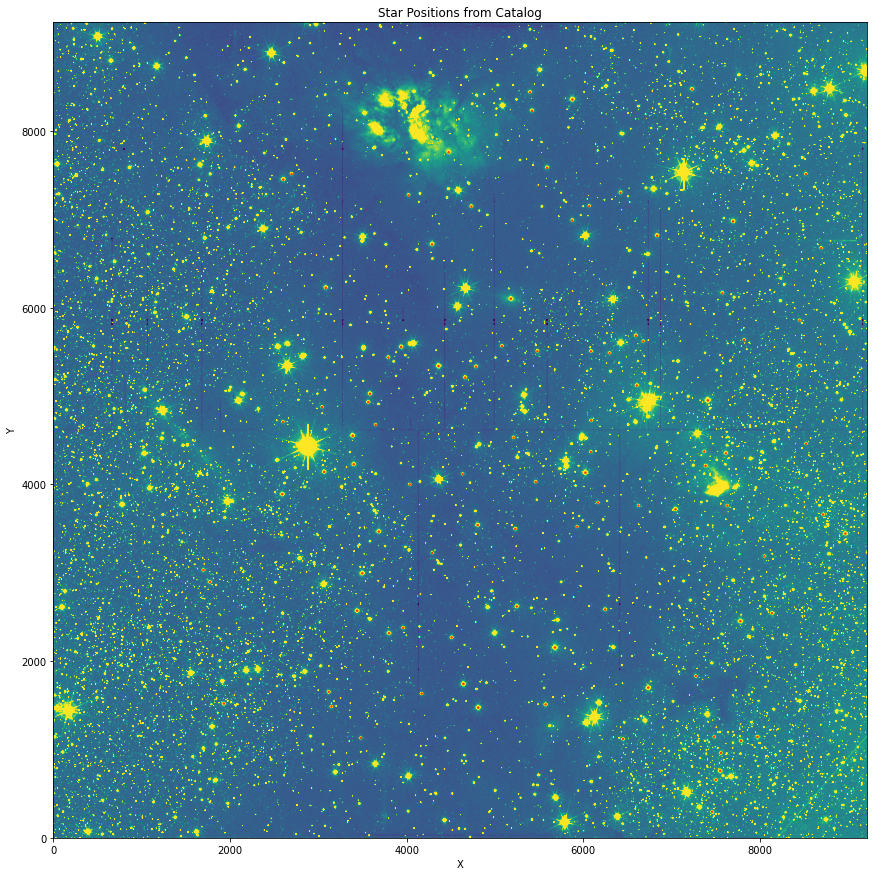

In [135]:
plot_star_positions(im, fit_results, q=[2.1, 97.9], x_col='x_fit', y_col='y_fit')